<a href="https://colab.research.google.com/github/shyamjith94/Machine-Learning-Regression/blob/main/RidgeRegressionGradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
%%capture
!pip install turicreate

In [20]:
import turicreate as tc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import log, sqrt
from sklearn.utils import shuffle

In [21]:
data = tc.SFrame.read_csv("/content/drive/My Drive/Machine Learning: Regression/Data/2/c_kc_house_data.csv/kc_house_data.csv")

Finished parsing file /content/drive/My Drive/Machine Learning: Regression/Data/2/c_kc_house_data.csv/kc_house_data.csv

Parsing completed. Parsed 100 lines in 0.169873 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/drive/My Drive/Machine Learning: Regression/Data/2/c_kc_house_data.csv/kc_house_data.csv

Parsing completed. Parsed 21613 lines in 0.115717 secs.

**Convert SFrame Data to Numpy**

In [30]:
def get_numpy_data(frame, feature, output):
    """ convert sframe to numpy data
        frame   :- Sframe
        feature :- list of fetures
        output  :- name of output variable (price)
        return  :- two arrays feature matrix and output array"""
    # add constant to sframe
    frame["constant"] = 1 
    feature = ["constant"] + feature
    
    # select feature column from frame include contant
    feature_frame = frame[feature]

    # convert to numpy
    feature_matrix = feature_frame.to_numpy()

    # select feature column from frame
    output_frame = frame[output]
    
    # convert to numpy
    output_array = output_frame.to_numpy()
    return (feature_matrix, output_array)


In [23]:
def predict_output(feature_matrix, weights):
    """ feature matrix is numpy array cantain column of feature and
        weights are corresponding numpy array
        create the vector prediction by using numpy dot product fun"""
    prediction = np.dot(feature_matrix, weights)
    return prediction

**Feature Derivative**

In [35]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if feature_is_constant:
        derivative = 2 * np.dot(errors, feature)
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    else:
        derivative = 2 * np.dot(errors, feature) + 2*l2_penalty*weight
    return derivative

**Gradient Descent**

In [36]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    print('Starting gradient descent with l2_penalty = ' + str(l2_penalty))
    
    weights = np.array(initial_weights) # make sure it's a numpy array
    iteration = 0 # iteration counter
    print_frequency = 1  # for adjusting frequency of debugging output
    
    # while not reached maximum number of iterations:
    while iteration < max_iterations:
        iteration += 1  # increment iteration counter
        
        # code section for adjusting frequency of debugging output.
        if iteration == 10:
            print_frequency = 10
        if iteration == 100:
            print_frequency = 100
        if iteration%print_frequency==0:
            print('Iteration = ' + str(iteration))
        # end code section        
        
        # compute the predictions based on feature_matrix and weights 
        # using your predict_output() function
        predictions = predict_output(feature_matrix, weights)

        # compute the errors as predictions - output
        errors = predictions - output
        
        # from time to time, print the value of the cost function
        if iteration%print_frequency==0:
            print('Cost function = ', str(np.dot(errors,errors) + l2_penalty*(np.dot(weights,weights) - weights[0]**2)))
        
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            # parameters: errors, feature, weight, l2_penalty, feature_is_constant
            derivative = feature_derivative_ridge(errors, feature_matrix[:, i],
                                                  weights[i], l2_penalty, False)
            # subtract the step size times the derivative from the current weight
            weights[i] = weights[i] - step_size * derivative
            
    print('Done with gradient descent at iteration ', iteration)
    print('Learned weights = ', str(weights))
    return weights

In [25]:
simple_features = ['sqft_living']
my_output = 'price'

In [26]:
train_data,test_data = data.random_split(.8,seed=0)

**generate numpy matrix for train and test data**

In [32]:
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [33]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

In [37]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, 
                                                             initial_weights, step_size, 
                                                             0.0, max_iterations)

Starting gradient descent with l2_penalty = 0.0
Iteration = 1
Cost function =  7433051852335772.0
Iteration = 2
Cost function =  5394267213533688.0
Iteration = 3
Cost function =  4023237736286403.0
Iteration = 4
Cost function =  3101256183295487.0
Iteration = 5
Cost function =  2481247643601012.0
Iteration = 6
Cost function =  2064308076801446.5
Iteration = 7
Cost function =  1783927096156441.2
Iteration = 8
Cost function =  1595378201854741.8
Iteration = 9
Cost function =  1468583989698184.0
Iteration = 10
Cost function =  1383318190090050.5
Iteration = 20
Cost function =  1211562139024524.5
Iteration = 30
Cost function =  1208313761205656.2
Iteration = 40
Cost function =  1208252324779675.5
Iteration = 50
Cost function =  1208251162139724.8
Iteration = 60
Cost function =  1208251139442068.0
Iteration = 70
Cost function =  1208251138303840.5
Iteration = 80
Cost function =  1208251137573361.5
Iteration = 90
Cost function =  1208251136850594.0
Iteration = 100
Cost function =  1208251136

In [40]:
# consider high regularization. Set the l2_penalty to 1e11 and run ridge regression algorithm to learn the weights of your model.
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, 
                                                                initial_weights, step_size, 
                                                                1e11, max_iterations)

Starting gradient descent with l2_penalty = 100000000000.0
Iteration = 1
Cost function =  7433051852335772.0
Iteration = 2
Cost function =  5618303898910948.0
Iteration = 3
Cost function =  4920613327836152.0
Iteration = 4
Cost function =  4652382056353857.0
Iteration = 5
Cost function =  4549258949620442.0
Iteration = 6
Cost function =  4509612654569465.0
Iteration = 7
Cost function =  4494370397124783.0
Iteration = 8
Cost function =  4488510417904797.0
Iteration = 9
Cost function =  4486257512209394.0
Iteration = 10
Cost function =  4485391368044056.0
Iteration = 20
Cost function =  4484850428076406.0
Iteration = 30
Cost function =  4484850390029665.0
Iteration = 40
Cost function =  4484850390044601.0
Iteration = 50
Cost function =  4484850390046539.0
Iteration = 60
Cost function =  4484850390046748.0
Iteration = 70
Cost function =  4484850390046770.0
Iteration = 80
Cost function =  4484850390046772.0
Iteration = 90
Cost function =  4484850390046772.5
Iteration = 100
Cost function = 

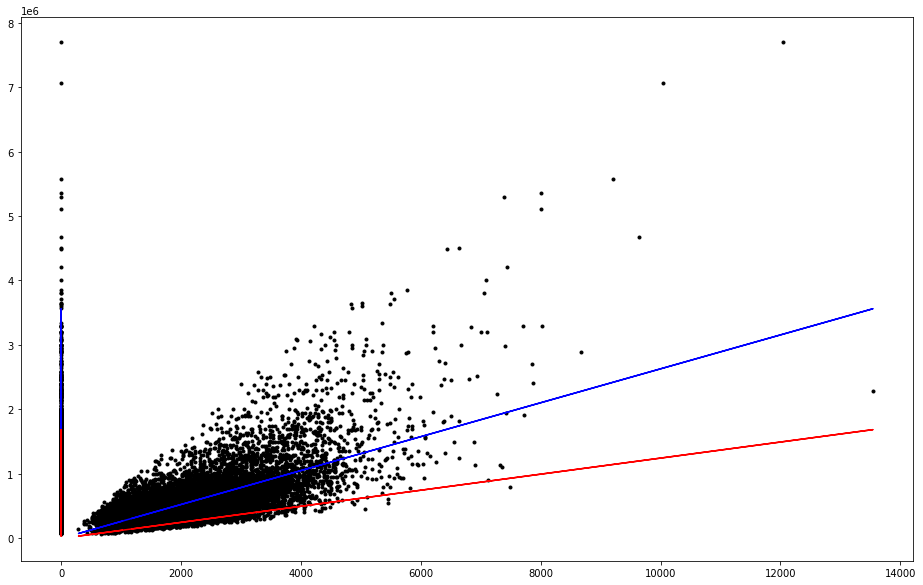

In [44]:
plt.figure(figsize=(16, 10))
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

**RSS on the TEST data - The initial weights (all zeros)**

In [45]:
initial_weights = np.array([0.0,0.0])
test_predictions_initial_weights = predict_output(simple_test_feature_matrix, initial_weights) 
errors = test_predictions_initial_weights - test_output # prediction errors

print("Initial weights:", initial_weights)
print("RSS = {:.3e}".format((errors**2).sum()))

Initial weights: [0. 0.]
RSS = 1.784e+15


**RSS on the TEST data - The weights learned with no regularization**

In [46]:
test_predictions_0_penalty = predict_output(simple_test_feature_matrix, simple_weights_0_penalty) 
errors = test_predictions_0_penalty - test_output # prediction errors

print("Weights learned with no regularization:", simple_weights_0_penalty)
print('RSS = {:.3e}'.format( (errors**2).sum()))

Weights learned with no regularization: [-1.63113515e-01  2.63024369e+02]
RSS = 2.757e+14


**RSS on the TEST data - The weights learned with high regularization**

In [47]:
test_predictions_high_penalty = predict_output(simple_test_feature_matrix, simple_weights_high_penalty) 
errors = test_predictions_high_penalty - test_output # prediction errors

print("Weights learned with high regularization:", simple_weights_high_penalty) 
print('RSS = {:.3e}'.format((errors**2).sum()))

Weights learned with high regularization: [4.87184758e-02 1.24574021e+02]
RSS = 6.947e+14


**Running Multiple regression with l2 penalty**

In [48]:
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [49]:
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

In [50]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, 
                                                             initial_weights, step_size, 
                                                             0.0, max_iterations)

Starting gradient descent with l2_penalty = 0.0
Iteration = 1
Cost function =  7433051852335772.0
Iteration = 2
Cost function =  4056752332045942.0
Iteration = 3
Cost function =  2529565114525310.0
Iteration = 4
Cost function =  1838556694300506.8
Iteration = 5
Cost function =  1525675575150296.5
Iteration = 6
Cost function =  1383789498571783.5
Iteration = 7
Cost function =  1319232606146273.5
Iteration = 8
Cost function =  1289648871879140.5
Iteration = 9
Cost function =  1275884723913736.5
Iteration = 10
Cost function =  1269278807397619.5
Iteration = 20
Cost function =  1257812386017016.0
Iteration = 30
Cost function =  1251954570861556.0
Iteration = 40
Cost function =  1246755422656425.8
Iteration = 50
Cost function =  1242139508166548.0
Iteration = 60
Cost function =  1238041400480994.0
Iteration = 70
Cost function =  1234403012742170.5
Iteration = 80
Cost function =  1231172774196731.5
Iteration = 90
Cost function =  1228304899227735.5
Iteration = 100
Cost function =  1225758738

In [51]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, 
                                                             initial_weights, step_size, 
                                                             1e11, max_iterations)

Starting gradient descent with l2_penalty = 100000000000.0
Iteration = 1
Cost function =  7433051852335772.0
Iteration = 2
Cost function =  4460489790922030.0
Iteration = 3
Cost function =  3796674504591489.0
Iteration = 4
Cost function =  3648319602094899.0
Iteration = 5
Cost function =  3615091213565495.0
Iteration = 6
Cost function =  3607602894633405.0
Iteration = 7
Cost function =  3605886518090020.0
Iteration = 8
Cost function =  3605475115347710.0
Iteration = 9
Cost function =  3605365453947493.5
Iteration = 10
Cost function =  3605329733905938.0
Iteration = 20
Cost function =  3605295066545630.0
Iteration = 30
Cost function =  3605294774663874.0
Iteration = 40
Cost function =  3605294771788592.0
Iteration = 50
Cost function =  3605294771762588.0
Iteration = 60
Cost function =  3605294771762597.5
Iteration = 70
Cost function =  3605294771762626.0
Iteration = 80
Cost function =  3605294771762630.0
Iteration = 90
Cost function =  3605294771762630.0
Iteration = 100
Cost function = 

In [52]:
initial_weights = np.array([0.0,0.0,0.0])
test_predictions_initial_weights = predict_output(test_feature_matrix, initial_weights) 
errors = test_predictions_initial_weights - test_output # prediction errors

print("Initial weights:", initial_weights)
print("RSS = {:.3e}".format( (errors**2).sum()))

Initial weights: [0. 0. 0.]
RSS = 1.784e+15


In [53]:
test_predictions_0_penalty = predict_output(test_feature_matrix, multiple_weights_0_penalty) 
errors = test_predictions_0_penalty - test_output # prediction errors
print("Weights learned with no regularization:", multiple_weights_0_penalty)
print("RSS = {:.3e}".format((errors**2).sum()))

Weights learned with no regularization: [ -0.35743483 243.05416982  22.41481497]
RSS = 2.741e+14


In [54]:
test_predictions_high_penalty = predict_output(test_feature_matrix, multiple_weights_high_penalty) 
errors = test_predictions_high_penalty - test_output # prediction errors
print("Weights learned with high regularization:", multiple_weights_high_penalty)
print("RSS = {:.3e}".format((errors**2).sum()))

Weights learned with high regularization: [3.36011655e-02 9.14901676e+01 7.84374903e+01]
RSS = 5.004e+14


In [55]:
test_predictions_high_penalty = predict_output(test_feature_matrix, multiple_weights_high_penalty) 
errors = test_predictions_high_penalty - test_output # prediction errors
print("Weights learned with high regularization:", multiple_weights_high_penalty)
print("RSS = {:.3e}".format((errors**2).sum()))

Weights learned with high regularization: [3.36011655e-02 9.14901676e+01 7.84374903e+01]
RSS = 5.004e+14
